In [1]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import pymysql
conn = pymysql.Connect(  # 配置数据库
    host='1.15.220.155',
    port=3306,
    user='test',
    password='991125',
    db='spider',
    charset='UTF8'
)
cursor = conn.cursor()

sql = 'select title_len, ipc_code, app_code, ipc_sum from cluster'
cursor.execute(sql)

dataset = cursor.fetchall()

In [3]:
X = np.array(dataset, dtype=int)
print(X[0])

[       34 104021040         0       266]


In [4]:
X = StandardScaler().fit_transform(X)
print(X[0])

[ 0.62908632 -0.30178006 -0.41288346 -1.56928696]


In [5]:
# Compute DBSCAN
db = DBSCAN(eps=0.8, min_samples=2).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [6]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 28
Silhouette Coefficient: 0.050


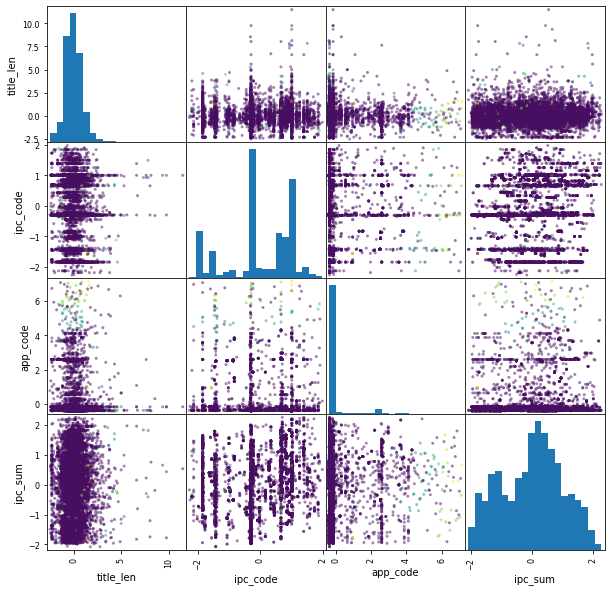

In [7]:
df = pd.DataFrame(X, columns=['title_len', 'ipc_code', 'app_code', 'ipc_sum'])
grr = pd.plotting.scatter_matrix(df,c = labels,hist_kwds={'bins':20}, figsize=[10,10])

In [8]:
# import pymysql
# conn = pymysql.Connect(  # 配置数据库
#     host='1.15.220.155',
#     port=3306,
#     user='test',
#     password='991125',
#     db='spider',
#     charset='UTF8'
# )
# cursor = conn.cursor()

# sql = 'select ipc from cluster'
# cursor.execute(sql)
# res = cursor.fetchall()
# count = 1
# for ip in res:
#     m = 0
#     sum = 0
#     ip = ip[0]
#     numbers = ip.split('.')
#     for n in numbers:
#         sum += int(n) * (count + m)
#         m += 1
#     sql = 'update cluster set ipc_sum = %s where ipc = %s'
#     cursor.execute(sql,[sum, ip])
#     conn.commit()